In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

C:\Users\jfan3\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [75]:
health=pd.read_csv('healthcare.csv')
prod=pd.read_csv('productivity.csv')
gdp=pd.read_csv('gdp.csv')
prod.rename(columns={'Value': 'prod','LOCATION':'country','TIME':'year'}, inplace=True)
health.rename(columns={'Value': 'health','LOCATION':'country','TIME':'year'}, inplace=True)
gdp.rename(columns={'Value': 'gdp','LOCATION':'country','TIME':'year'}, inplace=True)

prod=prod[['country','year','prod']]
health=health[['country','year','health']]
gdp=gdp[['country','year','gdp']]
print(gdp.head())
df = prod.set_index(['country','year']).join(health.set_index(['country','year']))
df = df.join(gdp.set_index(['country','year']))
df.dropna(axis=0, how='any')

  country  year          gdp
0     AUS  1971  4862.084581
1     AUS  1972  5208.919749
2     AUS  1973  5792.452765
3     AUS  1974  6241.474421
4     AUS  1975  6934.065613


prod    health           gdp
country year                                    
AUS     1971   57.304477   223.368   4862.084581
        1972   58.565714   238.929   5208.919749
        1973   59.771881   263.759   5792.452765
        1974   58.820676   321.966   6241.474421
        1975   60.997822   401.388   6934.065613
        1976   62.016054   429.564   7390.445655
        1977   61.945916   472.360   7720.400272
        1978   64.559538   510.131   8544.449053
        1979   64.866407   554.135   9442.488298
        1980   65.563894   615.024  10461.350034
        1981   67.503095   696.554  11819.865264
        1982   68.336796   731.025  11879.178161
        1983   70.060648   772.572  12674.522083
        1984   71.584459   816.356  13472.887356
        1985   71.458925   880.083  14395.713489
        1986   71.464708   940.026  14816.752950
        1987   72.945871   980.637  15933.602155
        1988   72.721583  1038.675  16935.983506
        1989   72.955931  1090.225  17678.363975
        1990   71.646931  1153.055  17568.324456
        1991   73.304090  1228.511  17926.090088
        1992   75.553744  1307.019  18937.500553
        1993   75.715980  1380.613  19929.781368
        1994   75.844022  1470.797  21134.146637
        1995   78.135799  1554.720  22098.572883
        1996   80.885376  1645.072  22974.739168
        1997   83.595550  1730.913  24160.255141
        1998   86.292457  1858.292  25342.189772
        1999   87.063003  1986.493  26777.755625
        2000   87.956610  2156.869  27888.229507
...                  ...       ...           ...
LVA     2004   83.735566   761.389  12219.468241
        2005   90.569425   811.519  13847.870041
        2006   95.754430   904.260  15752.362955
        2007  102.984028  1045.357  18120.399861
        2008   93.971784  1093.119  19428.571875
        2009   96.316003  1039.317  16866.295093
        2010  100.000000  1081.676  17578.061982
        2011  103.901854  1101.782  19781.826568
        2012  107.519842  1151.918  21259.866516
        2013  108.018811  1224.490  22674.541792
        2014  110.914845  1310.840  23802.335470
        2015  114.797149  1434.350  24512.716025
        2016  117.644199  1466.262  25588.909354
SVN     2000   79.520941  1403.936  18043.181273
        2001   82.083556  1496.414  18972.107641
        2002   82.707521  1623.612  20299.933243
        2003   85.155695  1707.865  21126.393780
        2004   87.952422  1806.753  22782.059110
        2005   94.083268  1907.253  23941.234638
        2006   99.573168  2011.231  25753.918172
        2007  103.809158  2068.092  27590.779166
        2008  103.385496  2325.314  29614.587595
        2009   96.767066  2354.828  27444.259300
        2010  100.000000  2379.531  27763.191988
        2011  103.405006  2459.958  28804.727303
        2012  102.734592  2517.065  28906.328743
        2013  101.625987  2586.043  29802.653408
        2014  103.069933  2647.447  30856.803210
        2015  103.740362  2730.800  31471.878591
        2016  106.298071  2834.772  32729.606427

[1248 rows x 3 columns]

In [31]:
country=set(df.index.get_level_values('country'))

  country  year_x    health  year_y        prod
0     AUS    2011  3794.087    2011  101.168923
1     AUT    2011  4383.705    2011  100.992252
2     BEL    2011  4158.285    2011   99.535369
3     CAN    2011  4247.829    2011  101.736016
4     CZE    2011  2009.164    2011  101.710250


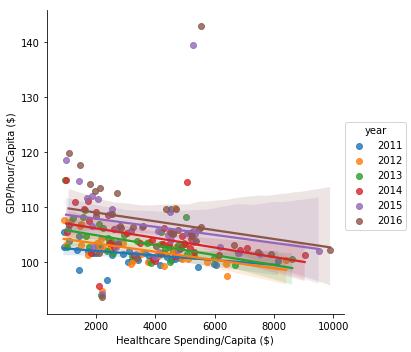

In [76]:
def select_by_year(health,prod,years):
    li=[]
#     final.set_index()
    for year in years:
        health2=health.loc[health['year'] == year]
        prod2=prod.loc[prod['year'] == year]
    #     print(health2.head())
    #     print(prod2.head())
        temp = health2.merge(prod2,on='country',how='inner')
        li.append(temp)
        
    final=pd.concat(li)
    return final
data=select_by_year(health,prod,range(2011,2017))
print(data.head())
data.rename(columns={'year_y': 'year'}, inplace=True)
g = sns.lmplot(x="health", y="prod",truncate=True,hue="year", size=5, data=data)
g.set_axis_labels("Healthcare Spending/Capita ($)", "GDP/hour/Capita ($)")
g.set_titles("Healthcare Spending VS Productivity")
g.savefig("year_plot.png")

[ 9.08844960e-02  1.96338579e-01 -3.52549264e+02]
[ 8.82993964e-02  2.30156495e+00 -4.68515467e+02]
[ 8.84276491e-02  2.35558242e+00 -5.01449828e+02]
[ 9.11784799e-02  1.42752425e+00 -4.70978806e+02]
[ 8.88731990e-02 -1.98713479e-01 -2.82559441e+02]
[ 8.71573675e-02 -3.31572832e-01 -2.44507534e+02]
[ 9.17245867e-02  1.24461483e+00 -4.33178854e+02]
[ 9.55408953e-02  3.15504062e+00 -6.42565132e+02]
[ 1.00158954e-01  2.30363725e+00 -6.41385833e+02]
[ 1.01301004e-01  3.16723967e+00 -7.73939644e+02]
[ 1.00035897e-01  4.34972551e+00 -8.64605747e+02]
[ 9.46798173e-02 -2.06385178e+00 -1.63857363e+02]
[ 9.19557306e-02 -2.39897478e+01  2.05284732e+03]
[ 9.35349674e-02 -1.36620162e+01  1.05320235e+03]
[ 1.05801878e-01  1.23745442e+01 -1.65329593e+03]
[ 0.10409678 -4.35090035 -0.043509  ]
[ 9.47504153e-02 -4.98244352e+01  4.91241620e+03]
[ 9.96073511e-02 -3.86569052e+01  3.66977808e+03]
[ 9.76148769e-02 -6.66091154e+01  6.70394534e+03]
[ 9.61828416e-02 -7.47272492e+01  7.68540541e+03]
[ 9.85974116

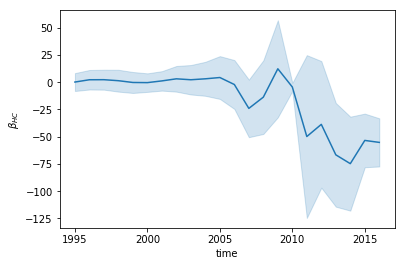

In [168]:
def regressions(health,prod,gdp,years):
    betas=np.zeros((len(years),3))
    for (i,year) in enumerate(years):
#         print (len(Y))
        gdp2=gdp.loc[gdp['year'] == year]
        prod2=prod.loc[prod['year'] == year]
        health2=health.loc[health['year'] == year]
        temp = gdp2.merge(prod2,on='country',how='inner')
        temp = temp.merge(health2,on='country',how='inner')
        temp['const']=1
        X=temp[['gdp','prod','const']]
        Y=temp['health']
#         print(len(temp))
#         X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
#         print(results.summary())
        print (np.array(results.params))
        betas[i,1]=results.params[1]
        se=results.bse[1]
        betas[i,0]=betas[i,1]-se
        betas[i,2]=betas[i,1]+se
    return betas

time = np.arange(1995,2017)
betas=regressions(health,prod,gdp,time)
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 5)
x=betas[:,1]
low=betas[:,0]
high=betas[:,2]
ax.plot(time,betas[:,1])
palette = sns.color_palette()
ax.fill_between(time, low, high, alpha=.2, color=palette.pop(0))
ax.set_xlabel("time")
ax.set_ylabel(r"$\beta_{HC}$")
# ax.set_title('Boost of Productivity by Healthcare over Time')
fig.savefig('betas')

In [158]:
gdp2=gdp.loc[gdp['year'] == 2010]
prod2=prod.loc[prod['year'] == 2010]
print(len(gdp2),len(prod2))

36 36
